### Student Information
Name: 劉芷昀

Student ID: 111000206

GitHub ID: selinaliu1030

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

### Table of Contents


1.   NewDataset (Second Part)
  
  *   Downloading Data
  *   Preprocessing
  *   Data Exploration
  *   Classification
      > Some Extra Graph in it (Third Part)

2.   TFID (Third Part)
  * Preprocessing
  *   Classification
      > Some Extra Graph in it (Third Part)

3. Improvment (Fourth Part)

In [ ]:
### Begin Assignment Here

### Second Part

### Downloading Data

In [1]:
## Download Data
import pandas as pd
import numpy as np
import data_mining_helpers as dmh

X = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
len(X)

1500

In [2]:
## Checking data

X.isnull().apply(lambda x: dmh.check_missing_values(x))
sum(X.duplicated('comment'))
X.drop_duplicates(keep=False, inplace=True)
len(X)

1498

In [3]:
X[X['sentiment'] == 'nostalgia']

,sentiment,comment
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
6,nostalgia,"My dad loved listening to Jim Reeves, when I w..."
...,...,...
1488,nostalgia,Yup !!!! Bringing back an Enormous amount of ...
1491,nostalgia,real music...how i miss those days...brings ba...
1492,nostalgia,i used to cry over this song cause i had a boy...
1498,nostalgia,I was born in 1954 and started to be aware of ...


### Preprocessing


### Sampling

In [4]:
## Sampling
X_sample = X.sample(n=500)
len(X_sample)

500

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'nostalgia distribution'}, xlabel='sentiment'>

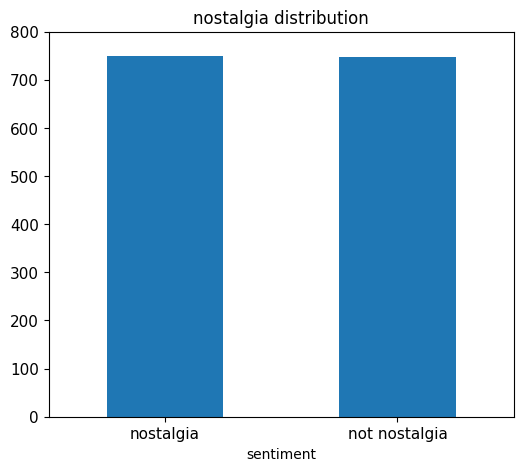

In [6]:
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'nostalgia distribution',
                                    ylim = [0, 800],
                                    rot = 0, fontsize = 11, figsize = (6,5))

sentiment
not nostalgia    254
nostalgia        246
Name: count, dtype: int64


<Axes: title={'center': 'nostalgia distribution'}, xlabel='sentiment'>

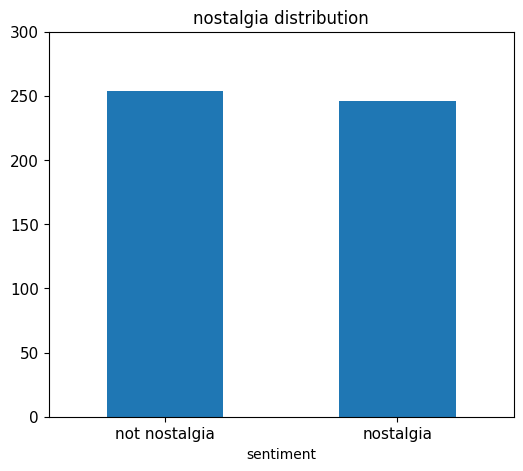

In [ ]:
print(X_sample.sentiment.value_counts())

# plot barchart for X
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'nostalgia distribution',
                                    ylim = [0, 300],
                                    rot = 0, fontsize = 11, figsize = (6,5))

<Axes: title={'center': 'Nostalgia distribution'}, xlabel='sentiment'>

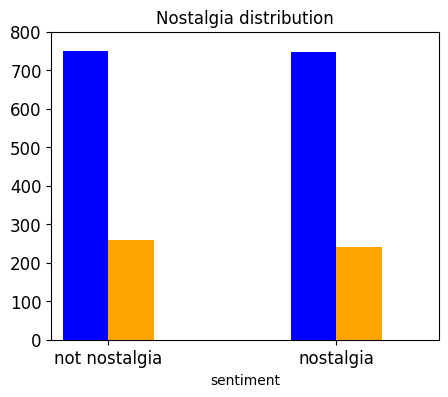

In [ ]:
X.sentiment.value_counts().plot(kind = 'bar',title = 'Nostalgia distribution', ylim = [0, 800], color='blue',
                                           rot = 0, fontsize = 12, position = 1, width=0.2, figsize = (5,4))
X_sample.sentiment.value_counts().plot(kind = 'bar',title = 'Nostalgia distribution', ylim = [0, 800], color='orange',
                                           rot = 0, fontsize = 12, position = 0, width=0.2,figsize = (5,4))

### Feature Creation

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
X[0:4]
list(X[0:1]['unigrams'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

In [ ]:
count_vect.get_feature_names_out()[3570]

'was'

In [ ]:
X_counts.shape

(1498, 3730)

In [ ]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [ ]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [ ]:
words = X_counts[0:5, 0:100].toarray().nonzero()
for i in words[1]:
  print(count_vect.get_feature_names_out()[i:i+1])

['16years']
['17']
['1st']
['2nd']
['30']


In [ ]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [ ]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [ ]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

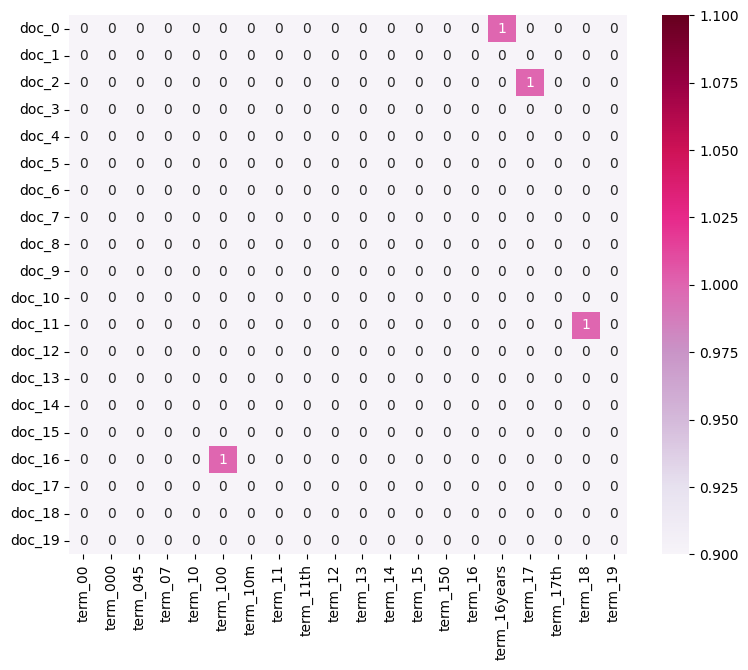

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=1, vmax=1, annot=True)

### Aggregation

In [ ]:
term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [ ]:
term_frequencies[15]

1

<ipython-input-166-9e2200e07593>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



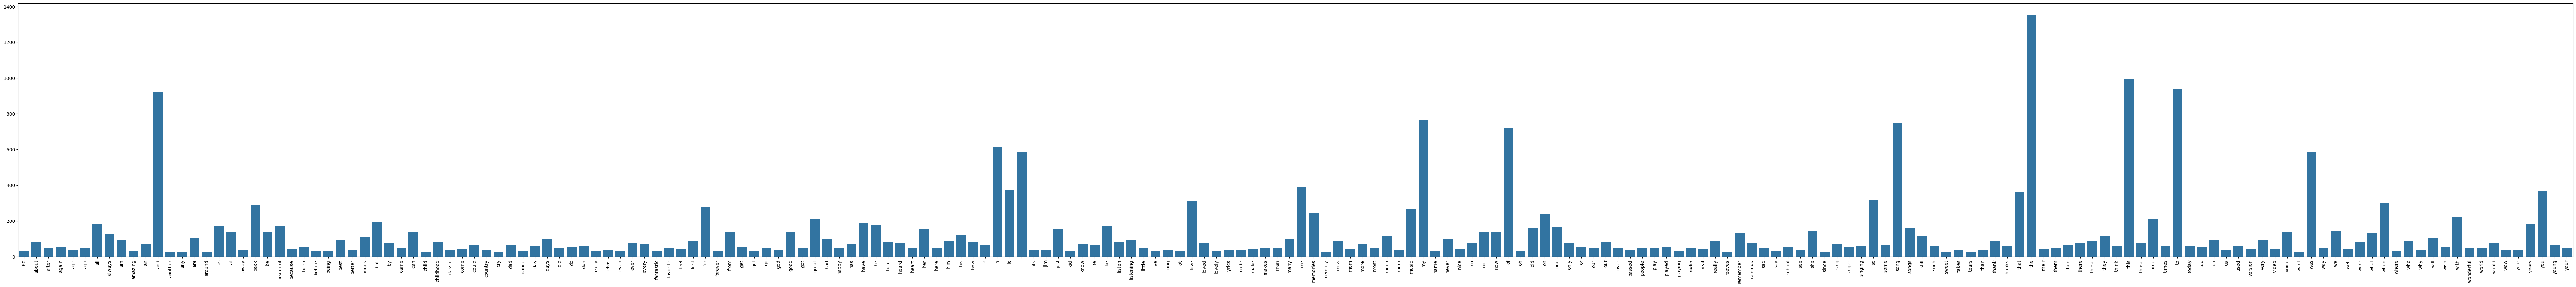

In [ ]:
term = []
name = []
for i in range(len(term_frequencies)):
  if term_frequencies[i] > 25:
    term.append(term_frequencies[i])
    name.append(count_vect.get_feature_names_out()[i])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=name, y=term)
g.set_xticklabels(name, rotation = 90);

In [ ]:
##long tail
!pip install plotly
import plotly.graph_objects as go

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=name, y=term)])

# Customize layout
fig.update_layout(
    xaxis_tickangle=-90,  # Rotate x-axis labels
    width=2000,
    height=500
)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<ipython-input-26-c02291356859>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



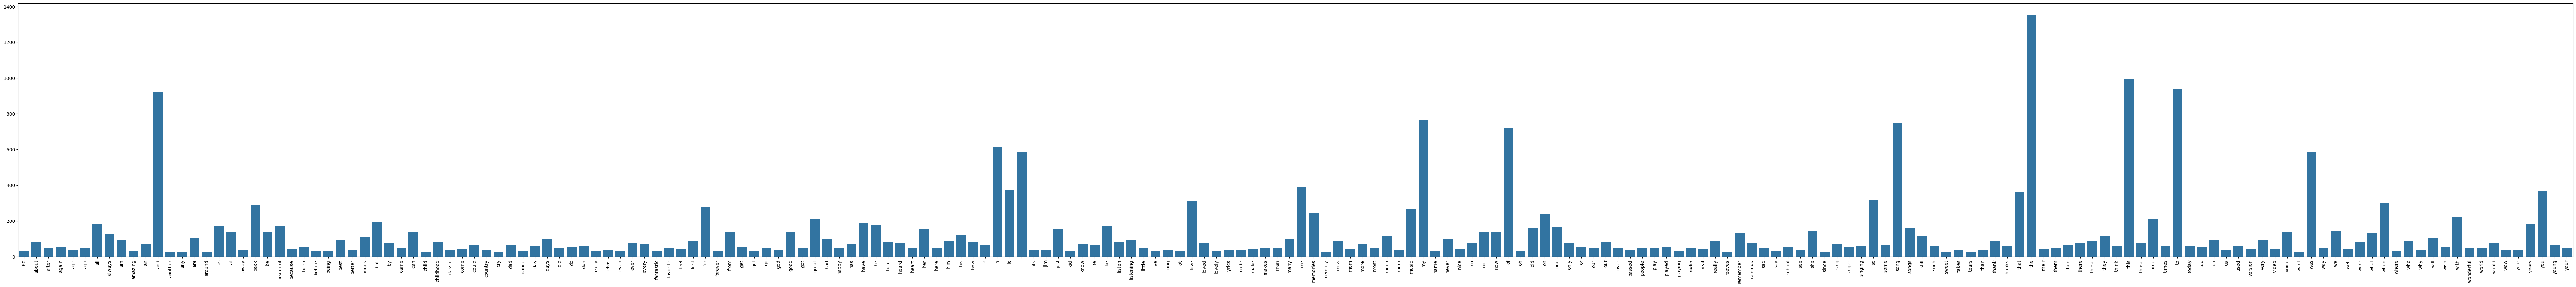

In [ ]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=name,y=term)
g.set_xticklabels(name, rotation = 90);

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector

print(f"Filtered Term-Document Frequency DataFrame for not nostalgia: \n {filt_term_document_dfs[categories[0]]}")

print(f"Filtered Term-Document Frequency DataFrame for nostalgia: \n{filt_term_document_dfs[categories[1]]}")

Filtered Term-Document Frequency DataFrame for not nostalgia: 
      00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   


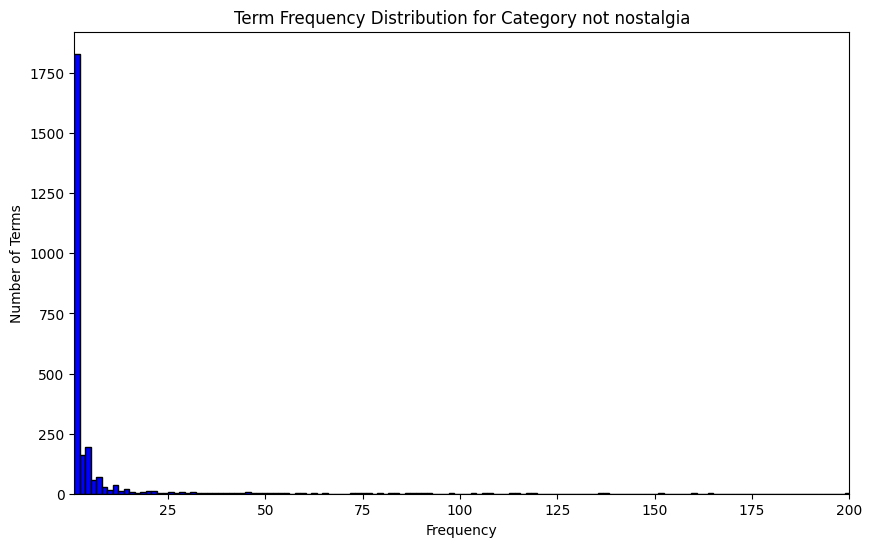

In [ ]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [ ]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'as', 'songs', 'beautiful', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'singer', 'an', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'man', 'video', 'some', 'heard', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [ ]:
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum']


In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

In [ ]:
!pip install PAMI
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    category_safe = category.replace(' ', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


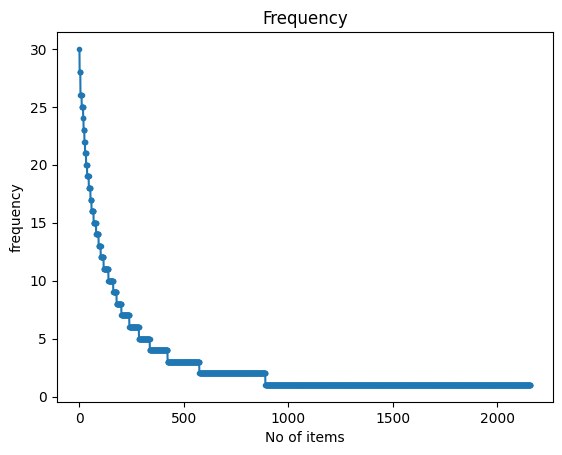

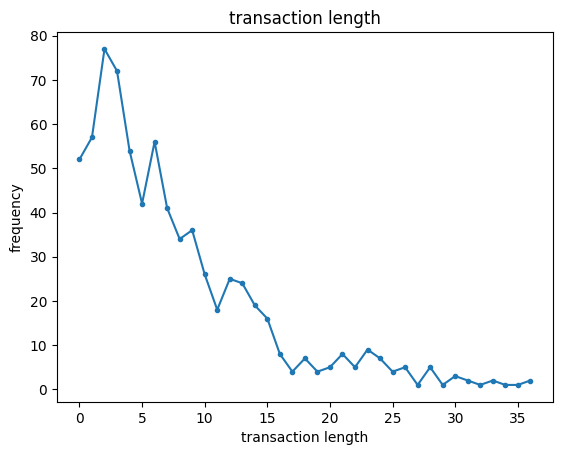

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


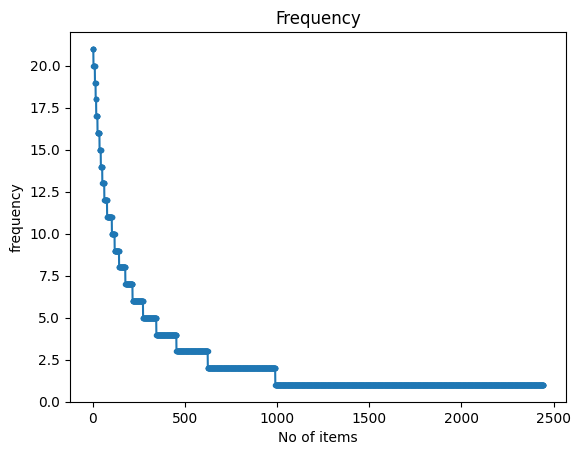

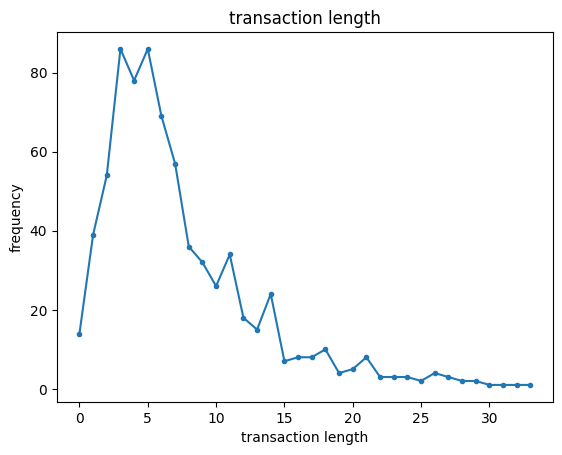

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.08874821662902832


,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,will,28
178,go,28


In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not = obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.049187421798706055


,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,elvis,21
140,every,21
141,loved,21
142,them,21


In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF, frequentPatternsDF_not]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,please,though,wonder,person,sung,handsome,perfect,ll,happy,its
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dimension Reduction

In [ ]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
!pip install umap-learn
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [ ]:
print(X_pca_tdm.shape)
print(X_tsne_tdm.shape)
print(X_umap_tdm.shape)

(1498, 2)
(1498, 2)
(1498, 2)


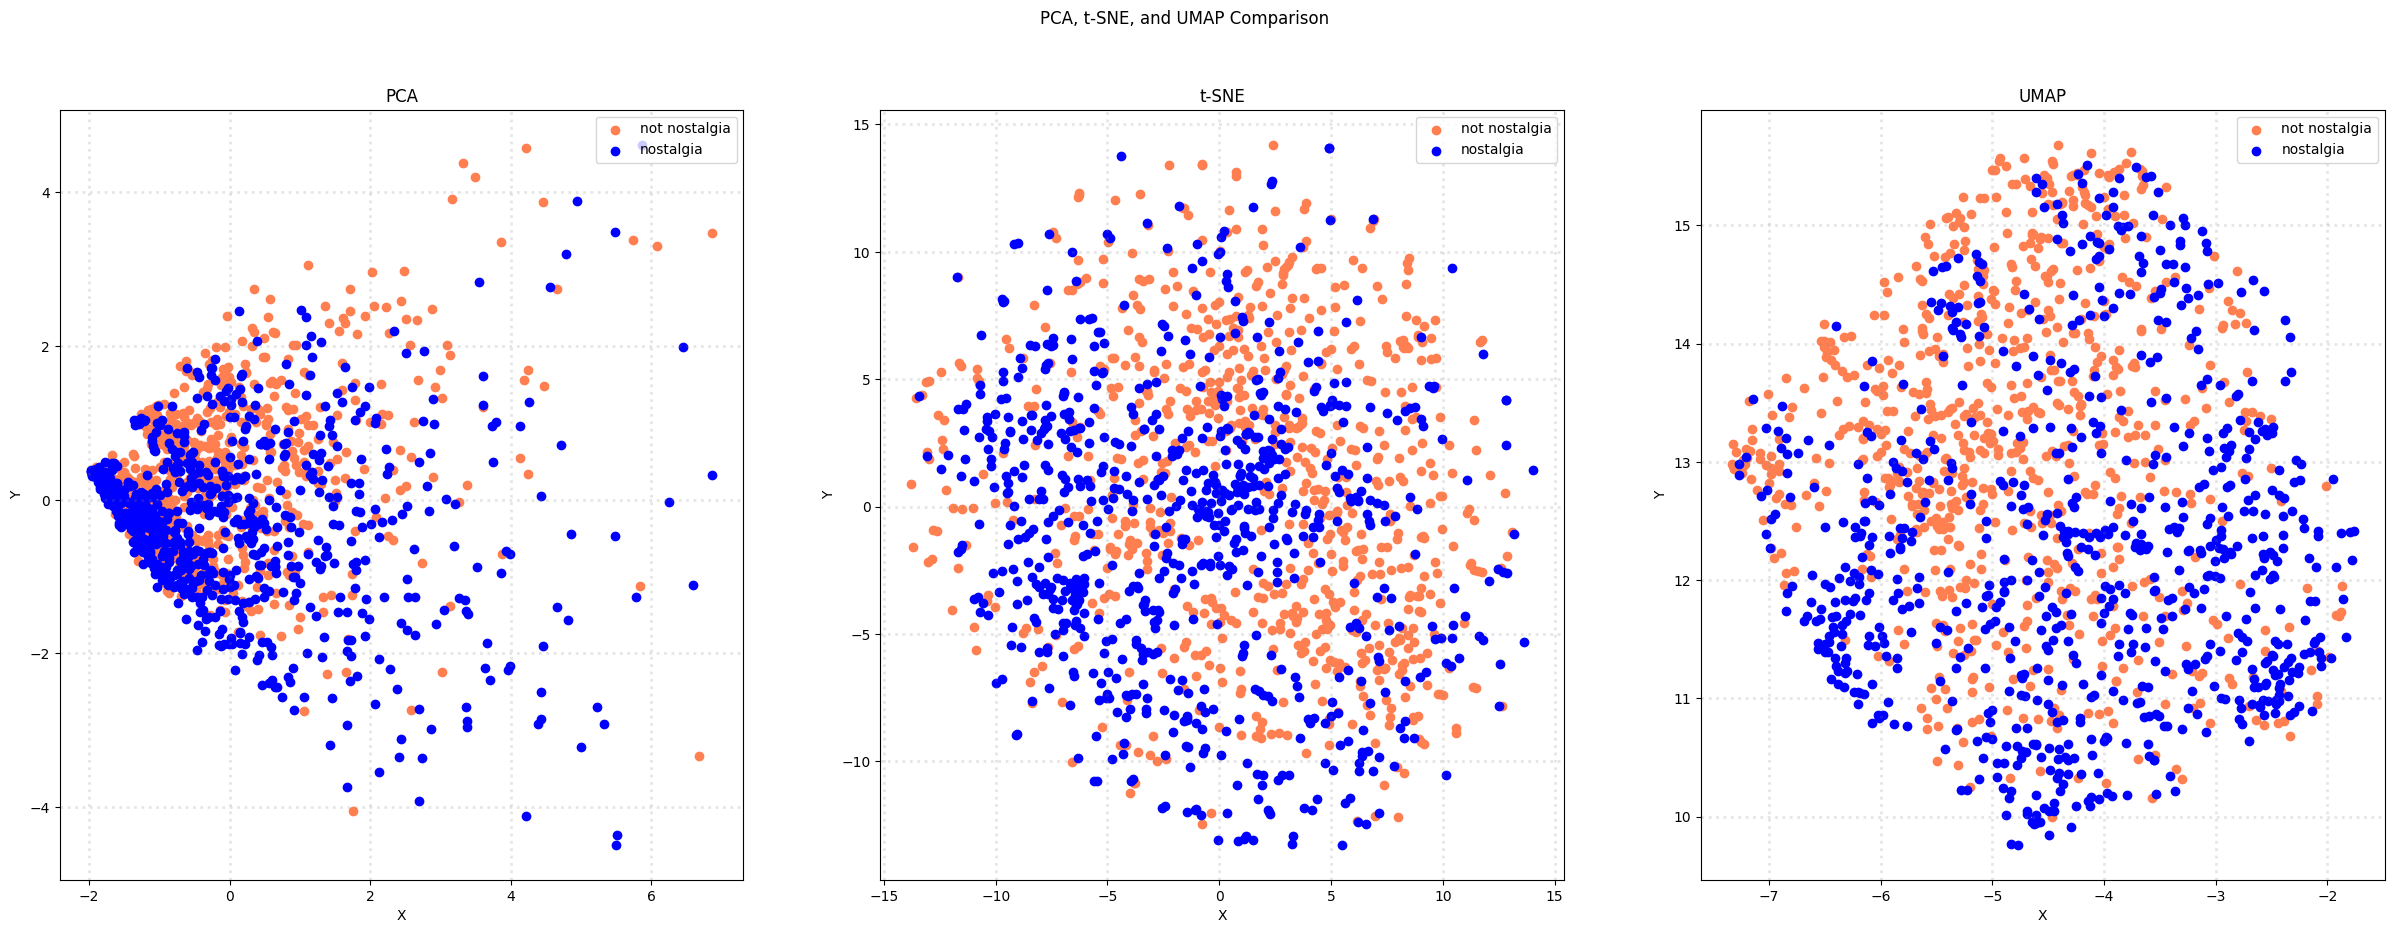

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [ ]:
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

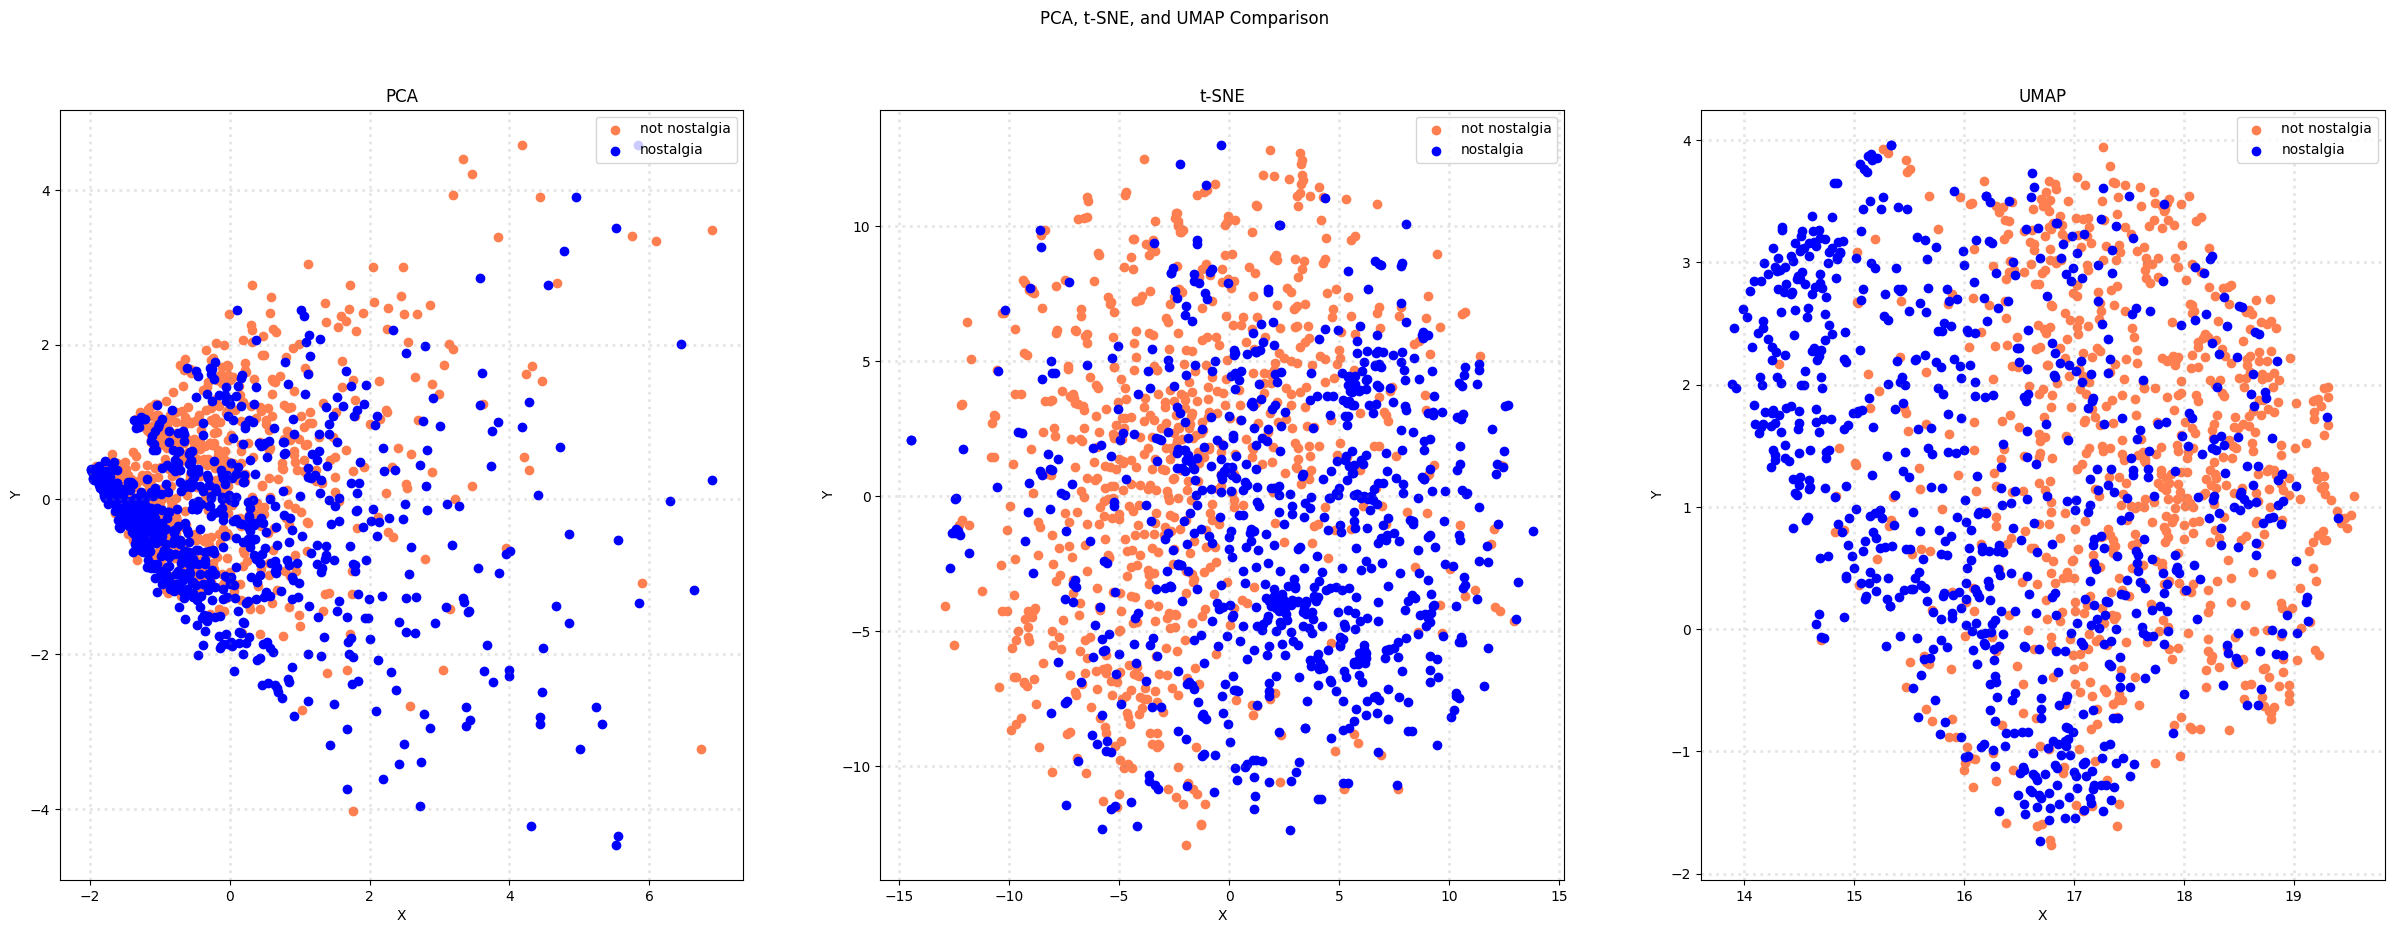

In [ ]:
# Plot the results in subplots
col = ['coral', 'blue']
categories = X['sentiment'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_aug3 = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_aug3 = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_aug3 = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue']
categories = X['sentiment'].unique()

In [ ]:
fig = plt.figure(figsize=(30, 90))
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(z, y, degree, X_reduced, title):
    ax = fig.add_subplot(y, 3, z, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        zs = X_reduced[X['sentiment'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')
    ax.view_init(elev=10., azim=degree)

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(1, 1, 30,  X_pca_aug3, 'PCA')
plot_scatter(2, 1, 30,  X_tsne_aug3, 't-SNE')
plot_scatter(3, 1, 30,  X_umap_aug3, 'UMAP')

plot_scatter(1, 2, 60,  X_pca_aug3, 'PCA')
plot_scatter(2, 2, 60,  X_tsne_aug3, 't-SNE')
plot_scatter(3, 2, 60,  X_umap_aug3, 'UMAP')

plot_scatter(1, 3, 90,  X_pca_aug3, 'PCA')
plot_scatter(2, 3, 90,  X_tsne_aug3, 't-SNE')
plot_scatter(3, 3, 90,  X_umap_aug3, 'UMAP')

plt.show()

### Discretization & Binarization

In [ ]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [ ]:
mlb = preprocessing.LabelBinarizer()

In [ ]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [ ]:
X['bin_category'] = mlb.transform(X['sentiment']).tolist()

In [ ]:
X[0:9]

,sentiment,comment,unigrams,tokenized_comment,bin_category
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{his, loving., was, He, many, Thank, at, we, v...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{The, when, his, was, beautiful, mist, love, s...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{graduated, his, Always, voice,, but, They, so...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{47, 2nd, when, be, blessing, ""marry, receive....",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{his, him, songs, played, listening, everyday,...",[0]
5,nostalgia,"Every time I heard this song as a child, I use...","[Every, time, I, heard, this, song, as, a, chi...","{it, many, still, this, reminded, your, RIP, c...",[0]
6,nostalgia,"My dad loved listening to Jim Reeves, when I w...","[My, dad, loved, listening, to, Jim, Reeves, ,...","{when, didn't, but, was, it, things., listenin...",[0]
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since child...,"[i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...","{am, TO, his, now, i, HAVE, Reeves, 71, tunes,...",[0]
8,not nostalgia,Wherever you are you always in my heart,"[Wherever, you, are, you, always, in, my, heart]","{you, in, Wherever, heart, my, are, always}",[1]


### Data Exploration

In [ ]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [ ]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [ ]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [ ]:
vec_cnt = np.concatenate((document_vector_count_1.todense()[:,0:200], document_vector_count_2.todense()[:,0:200],document_vector_count_3.todense()[:,0:200]))
vec_cnt.shape

(3, 200)

In [ ]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:200]]
y = [500, 1000, 1500]
plot_y = ["doc_"+str(i) for i in y]

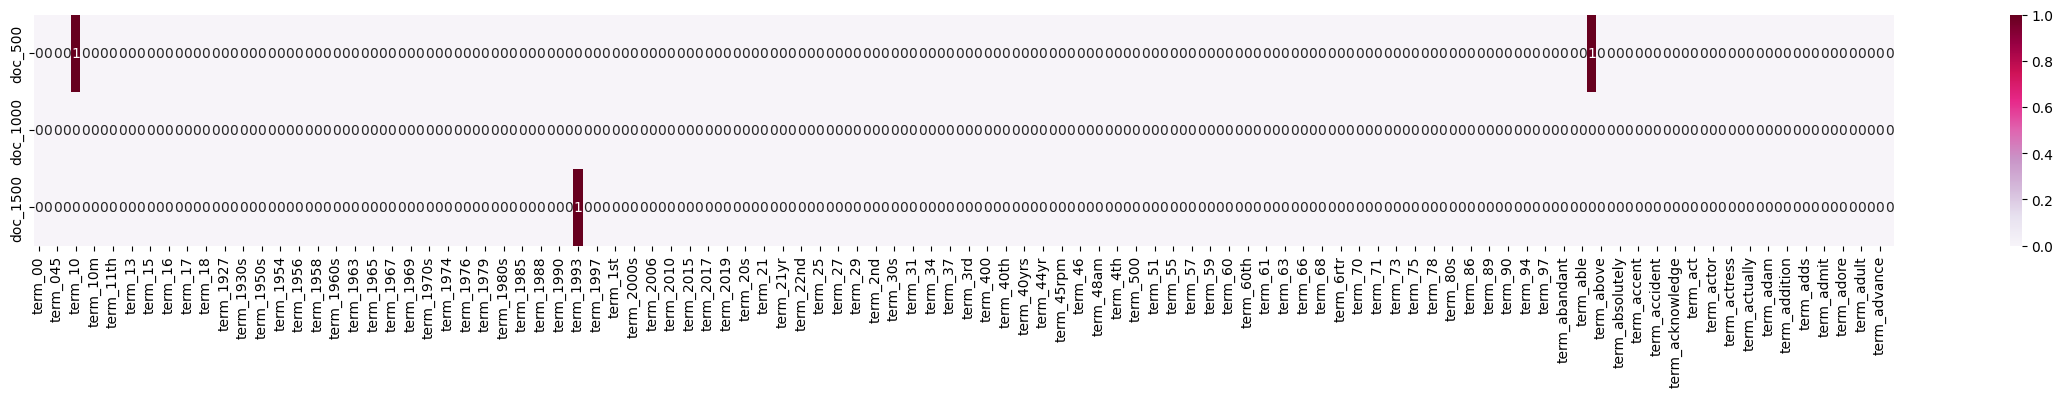

In [ ]:
## Draw a graph
import seaborn as sns

df_todraw = pd.DataFrame(vec_cnt, columns = plot_x, index = plot_y)
plt.subplots(figsize=(30, 3))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


<ipython-input-96-4a26afacce62>:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-96-4a26afacce62>:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-96-4a26afacce62>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-96-4a26afacce62>:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o

In [ ]:
## Draw a picture for all correlation, purple for doc 1, light sea green for doc 2, and gold for doc 3 ##
!pip install plotly
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = [0, 1, 2],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
            dict(range = [0, 1],
                 label = 'Doc 1', values = [cos_sim_count_1_1, cos_sim_count_1_2, cos_sim_count_1_3]),
            dict(range = [0, 1],
                 label = 'Doc 2', values = [cos_sim_count_1_2, cos_sim_count_2_2, cos_sim_count_2_3]),
            dict(range = [0, 1],
                 label = 'Doc 3', values = [cos_sim_count_1_3, cos_sim_count_2_3, cos_sim_count_3_3])
        ]),
    )
)
fig.show()

### Classification

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

target_names = ['not nostalgia', 'nostalgia']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
709,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8286    0.9486    0.8845       214
    nostalgia     0.9463    0.8220    0.8798       236

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [ ]:
!pip install plotly
import plotly.graph_objects as go

# Create random data with numpy

method = ['precision', 'recall', 'f1-score']
report = classification_report(y_test, y_pred, target_names=target_names, digits=4, output_dict=True)
y = []
y_not = []
for m in method:
  y.append(report['nostalgia'][m])
  y_not.append(report['not nostalgia'][m])

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=method, y=y,
                    mode='lines+markers',
                    name='nostalgia'))
fig.add_trace(go.Scatter(x=method, y=y_not,
                    mode='lines+markers',
                    name='not nostalgia'))
fig.update_layout(title='Calssification Report',
                   xaxis_title='method',
                   yaxis_title='rate')

fig.show()

### TFID (Thrid Part)

### Preprocessing

In [ ]:
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
X_counts_tfid = vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts_tfid[0])

In [ ]:
vect.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [ ]:
X_counts_tfid.shape

(1498, 3730)

In [ ]:
X_counts_tfid[0:5, 0:100].toarray()

In [ ]:
plot_x = ["term_"+str(i) for i in vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts_tfid[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

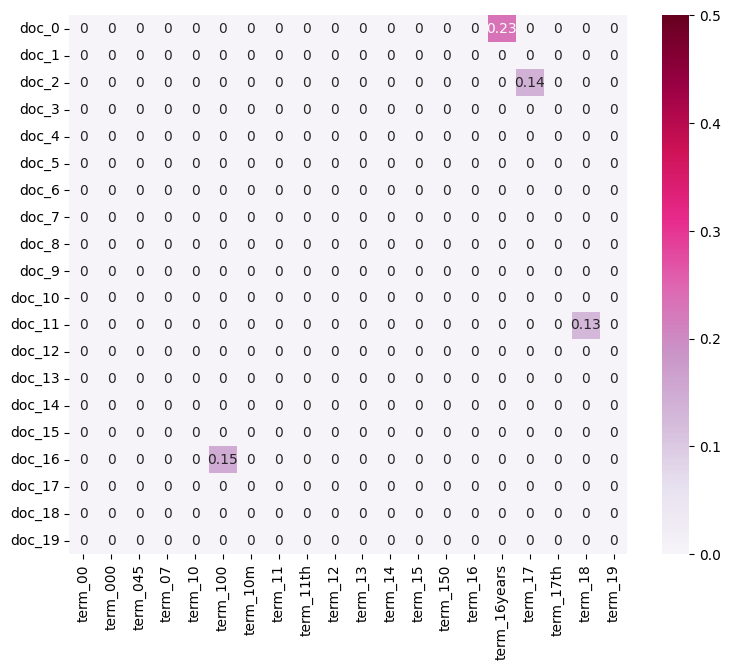

In [ ]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=0.5, annot=True)

In [ ]:
## sum up the tfid value for each word
term_tfid = []
term_tfid = np.asarray(X_counts_tfid.sum(axis=0))[0]

<ipython-input-126-5812dc77e163>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



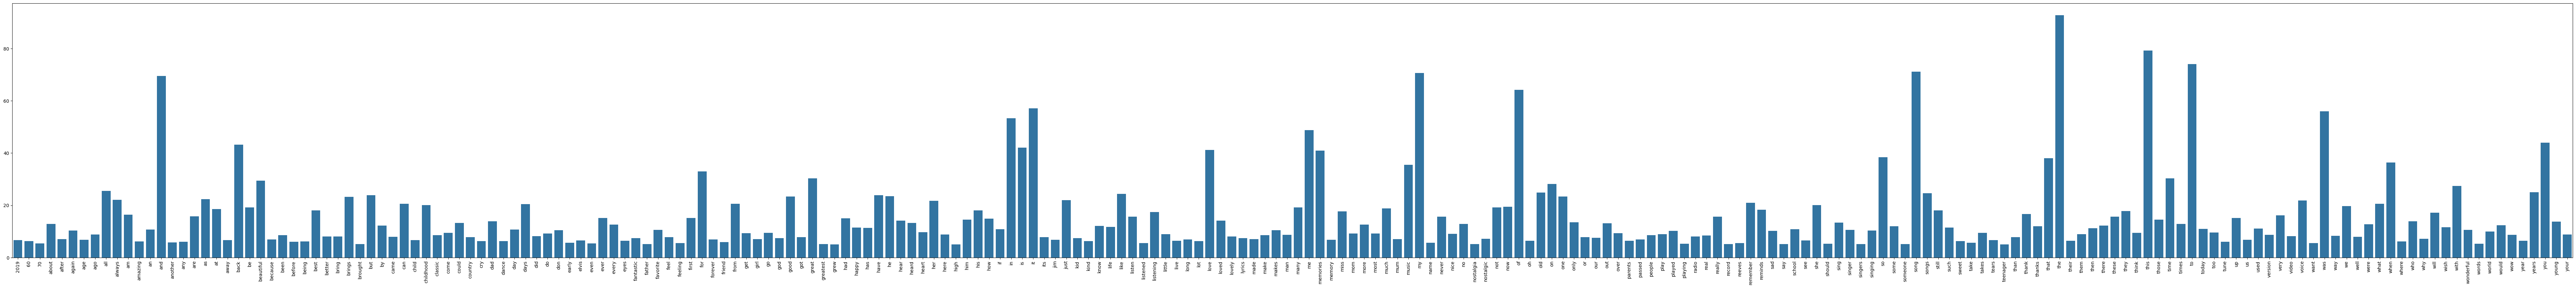

In [ ]:
term = []
name = []
for i in range(len(term_tfid)):
  if term_tfid[i] > 5:
    term.append(term_tfid[i])
    name.append(vect.get_feature_names_out()[i])

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=name, y=term)
g.set_xticklabels(name, rotation = 90);

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    vect = TfidfVectorizer()  # Initialize the TfidVectorizer
    X_counts = vect.fit_transform(df['comment'])  # Transform the text data into word counts

    # Get the unique words (vocabulary) from the vectorizer
    words = vect.get_feature_names_out()

    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [ ]:
# Display the filtered DataFrame

print(f"Filtered Term-Document Frequency DataFrame for not nostalgia: \n {filt_term_document_dfs[categories[0]]}")

print(f"Filtered Term-Document Frequency DataFrame for nostalgia: \n{filt_term_document_dfs[categories[1]]}")

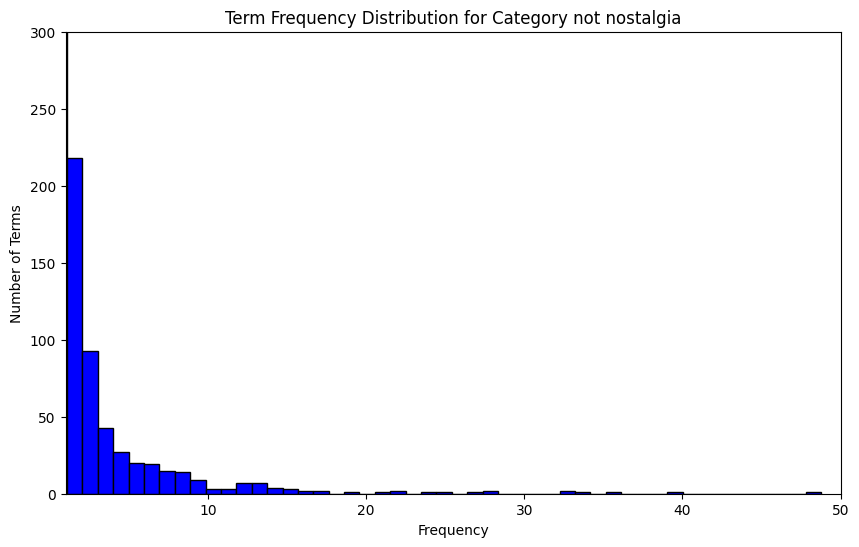

In [ ]:
 # Sum over all documents to get total Tfid for each word
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50, color='blue' , edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 50)
plt.ylim(0, 300)
plt.show()

In [ ]:
category_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term tfid in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted tfid
sorted_counts = np.sort(word_counts)[::-1]  # Sort tfid in descending order

# Calculate the index corresponding to the top 5% largest value terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% largest value terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'song', 'of', 'it', 'is', 'you', 'in', 'my', 'love', 'that', 'music', 'was', 'so', 'for', 'like', 'one', 'have', 'great', 'he', 'voice', 'with', 'me', 'beautiful', 'all', 'but', 'can', 'songs', 'not', 'on', 'what', 'just', 'time', 'be', 'her', 'will', 'she', 'as', 'always', 'when', 'they', 'ever', 'his', 'from', 'best', 'are', 'good', 'really', 'no', 'never', 'now', 'much', 'who', 'at', 'we', 'know', 'only', 'how', 'am', 'more', 'could', 'thank', 'about', 'old', 'still', 'would', 'if', 'very', 'by', 'don', 'these', 'listen', 'out', 'there', 'has', 'hear', 'version', 'singer', 'him', 'think', 'many', 'up', 'listening', 'sing', 'world', 'had', 'your', 'too', 'video', 'such', 'nice', 'an', 'today', 'heard', 'most', 'here', 'do', 'real', 'better', 'people', 'get', 'heart', 'man', 'some', 'make', 'than', 'classic', 'wish', 'sad', 'years', 'why', 'any', 'its', 'life', 'been', 'singing', 'those

In [ ]:
category_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term tfid values in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted tfid
sorted_counts = word_counts[sorted_indices]  # Sort tfid

# Calculate the index corresponding to the bottom 1% least tfid value terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least tfid value terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['dum', 'maine', 'adam', 'concerning', 'converts', 'character', 'evokes', 'illicit', 'cooler', 'elvis', 'canadian', '6rtr', 'drifted', 'daddy', 'felt', 'devistating', 'fresh', 'addition', 'additional', '20s', 'morning', 'deserve']


In [ ]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()

    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]

In [ ]:
!pip install PAMI
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    category_safe = category.replace(' ', '_')
    # Create the DenseFormatDF object and convert to a transactional database
    print(term_document_dfs[category].sum())
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}_tfid.csv', '>=', 0.2)

00         0.326643
000        0.309778
045        0.182033
10         0.869170
100        1.169129
             ...   
youtube    3.202043
yrs        0.519498
yuo        0.232060
zealand    0.299834
zulus      0.160060
Length: 2446, dtype: float64
07          0.513404
10          2.816443
11          1.227982
11th        0.267167
12          2.003935
              ...   
youth       3.338942
youthful    0.471799
youtube     1.296358
yrs         1.100290
yup         0.355567
Length: 2159, dtype: float64


Database size (total no of transactions) : 719
Number of items : 1743
Minimum Transaction Size : 1
Average Transaction Size : 5.257301808066759
Maximum Transaction Size : 14
Standard Deviation Transaction Size : 2.9505425270220824
Variance in Transaction Sizes : 8.717826135804525
Sparsity : 0.996983762588602


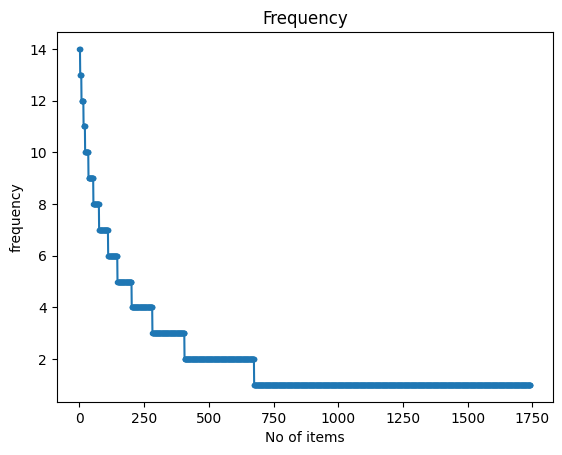

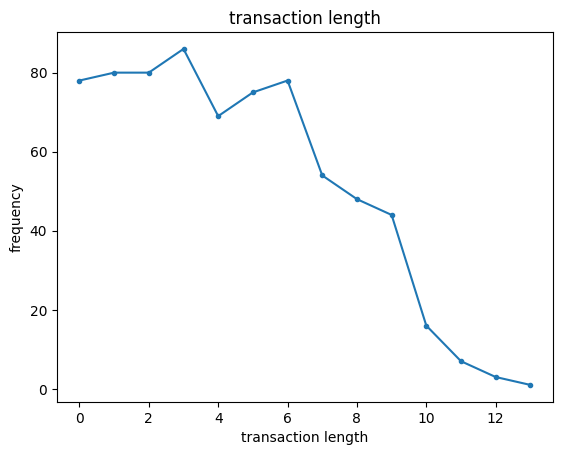

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia_tfid.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 733
Number of items : 2132
Minimum Transaction Size : 1
Average Transaction Size : 6.0272851296043655
Maximum Transaction Size : 14
Standard Deviation Transaction Size : 2.845128024416081
Variance in Transaction Sizes : 8.105811881704799
Sparsity : 0.9971729431849886


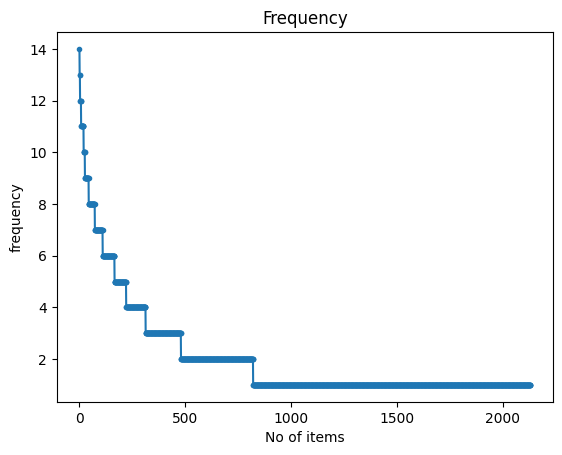

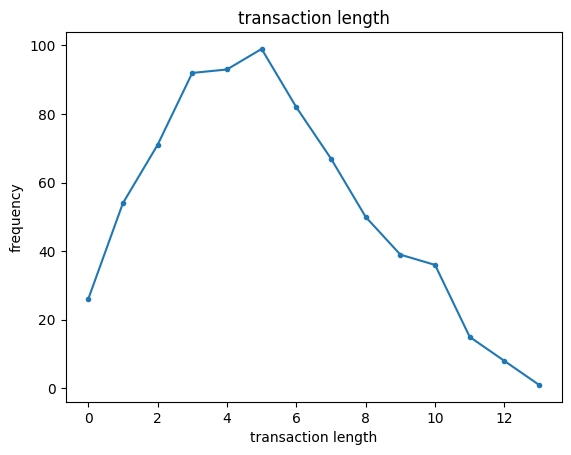

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj1 = tds.TransactionalDatabase('td_freq_db_not_nostalgia_tfid.csv')
obj1.run()
obj1.printStats()
obj1.plotGraphs()

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj3 = alg.FPGrowth(iFile='td_freq_db_nostalgia_tfid.csv', minSup=minSup)
obj3.mine()
tfidPatternsDF= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(tfidPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

obj3.save('tfid_patterns_nostalgia_minSup6.txt') #save the patterns
tfidPatternsDF

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 150
Runtime: 0.07942724227905273


,Patterns,Support
0,people,6
1,do,6
2,feeling,6
3,born,6
4,well,6
...,...,...
145,oh,13
146,child,13
147,sweet,14
148,lovely,14


In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=6
obj4 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia_tfid.csv', minSup=minSup)
obj4.mine()
tfidPatternsDF_not= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(tfidPatternsDF_not))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

obj3.save('tfid_patterns_nostalgia_minSup6.txt') #save the patterns
tfidPatternsDF_not

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 166
Runtime: 0.04677939414978027


,Patterns,Support
0,close,6
1,king,6
2,generation,6
3,radio,6
4,favorites,6
...,...,...
161,see,12
162,wow,12
163,elvis,13
164,days,13


In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [tfidPatternsDF, tfidPatternsDF_not]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

    Patterns  Support
221  forever       14
102      sad       14
101    sweet       14
96   parents       13
98    passed       13
..       ...      ...
118     told        6
117     find        6
116     back        6
115     work        6
111     mind        6

[222 rows x 2 columns]
Number of patterns discarded: 94


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
vect = TfidfVectorizer()
X_tdm = vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms =  vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df_tfid = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df_tfid = pd.concat([tdm_df_tfid, pattern_matrix], axis=1)

augmented_df_tfid

,00,000,045,07,10,100,10m,11,11th,12,...,keep,tell,lived,emotion,miss,told,find,back,work,mind
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Classification

In [ ]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

target_names = ['not nostalgia', 'nostalgia']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df_tfid, X['sentiment'], test_size=0.3, random_state=42)
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9022222222222223

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.8696    0.9346    0.9009       214
    nostalgia     0.9364    0.8729    0.9035       236

     accuracy                         0.9022       450
    macro avg     0.9030    0.9037    0.9022       450
 weighted avg     0.9046    0.9022    0.9023       450



In [ ]:
!pip install plotly
import plotly.graph_objects as go

# Create random data with numpy

method = ['precision', 'recall', 'f1-score']
report_tfid = classification_report(y_test, y_pred, target_names=target_names, digits=4, output_dict=True)
y = []
y_not = []
for m in method:
  y.append(report_tfid['nostalgia'][m])
  y_not.append(report_tfid['not nostalgia'][m])

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=method, y=y,
                    mode='lines+markers',
                    name='nostalgia'))
fig.add_trace(go.Scatter(x=method, y=y_not,
                    mode='lines+markers',
                    name='not nostalgia'))
fig.update_layout(title='Calssification Report',
                   xaxis_title='method',
                   yaxis_title='rate')

fig.show()

In [ ]:
## comparison between frequency classification & tfid classification
!pip install plotly
import plotly.graph_objects as go

# Create random data with numpy

method = ['macro avg', 'weighted avg']
y_freq = []
y_tfid = []
y_freq.append(report['accuracy'])
y_tfid.append(report_tfid['accuracy'])
for m in method:
  y_freq.append(report[m]['precision'])
  y_tfid.append(report_tfid[m]['precision'])
method = ['accuracy', 'macro avg', 'weighted avg']
# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=method, y=y_freq,
                    mode='lines+markers',
                    name='Frequency'))
fig.add_trace(go.Scatter(x=method, y=y_tfid,
                    mode='lines+markers',
                    name='TFID'))
fig.update_layout(title='Calssification Accurarcy between Frequency & TFID',
                   xaxis_title='method',
                   yaxis_title='rate'
                  )

fig.show()

I choose Bernoulli calssification for the TFID case, since it can deal with continuous data. As we can see in the graph above, Bernoulli Classification is better than using Multi-nomial classification in this case.

### Improvement

1. For the new dataset, since the downloaded dataset is already in
panda Dataframe type, so it's not neccesary to do the data transformation.
2. Also, since the new data set only has 2 attribute(nostalgia, and not nostalgia), so I find it not efficient to reduce the dimension to 3. reduce dimension 2 to is enough, and more readable as well.
3. Binarization will make the data difficult to read, especially for the dataset with many class, such as in lab1-Master. So, it would be better represent it in numeric.